<h1>logistic regression without applying polynomin</h1>

do regularization with modal 'liblinear'

# <h4>score: private 0.745 - public 0.753</h4>

In [4]:
import os
from sys import argv



# print(argv[0])

print(os.path.basename(argv[0]))




ipykernel_launcher.py


In [5]:
import os
nb_full_path = os.path.join(os.getcwd(), nb_name)

nb_full_path

NameError: name 'nb_name' is not defined

In [15]:
import csv
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression



train_url = 'https://raw.githubusercontent.com/lucascheng24/comp4432ML-Dont-over-fit-II/main/train.csv'
test_url = 'https://raw.githubusercontent.com/lucascheng24/comp4432ML-Dont-over-fit-II/main/test.csv'



In [16]:
train = pd.read_csv(train_url)
test = pd.read_csv(test_url)

train_y = train['target']
train = train.drop(columns=['id', 'target'])

test = test.drop(columns=['id'])


robust_scaler = RobustScaler().fit(train.values)
trans_x = robust_scaler.transform(train.values)
trans_test = robust_scaler.transform(test.values)

0.748


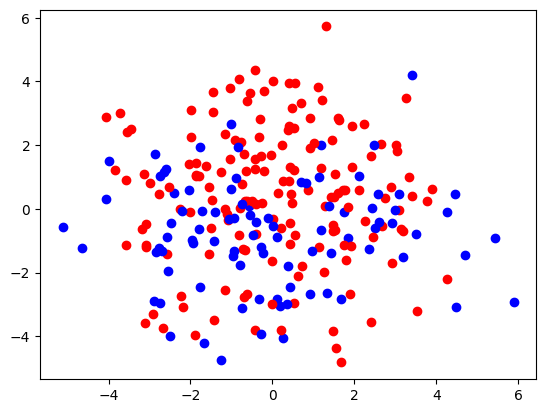

In [18]:

scores = []
# param_grid = {"C": [.01, .1, 1, 10, 100, 1000],
param_grid = {"C": [.01, .1, 1],
                "penalty": ('l1','l2')}
clf = LogisticRegression(random_state=0, solver='liblinear', class_weight='balanced', max_iter = 1000, penalty='l1')
gs = GridSearchCV(clf, param_grid, cv=5)
gs.fit(trans_x, train_y)

best_score = gs.best_score_
best_estimator = gs.best_estimator_
best_pca = 'N/a'
print(best_score)

pca = PCA(n_components=2)
pca.fit(train.values)
vals_2d = pca.transform(train.values)

colors = ['red' if t == 1 else 'blue' for t in train_y]
for i in range(len(vals_2d)):
    plt.scatter(x=vals_2d[i,0], y=vals_2d[i,1], color=colors[i])

<h3>Real prediction on testing data</h3>

In [19]:
param_grid = {"C": [.01, .1],
                "penalty": ('l1','l2')}
clf = LogisticRegression(random_state=0, solver='liblinear', class_weight='balanced', max_iter = 1000, penalty='l1')
gs = GridSearchCV(clf, param_grid, cv=5)
gs.fit(trans_x, train_y)
print(gs.best_estimator_)
print(gs.best_score_)
print(gs.score(trans_x, train_y))
predictions = gs.predict_proba(trans_test)[:,1]

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000, penalty='l1',
                   random_state=0, solver='saga')
0.748
0.856


In [20]:
pred_result_list = [int(round(x)) for x in predictions]

In [21]:

with open('../result_folder/logistic_V12_liblinear.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["id", "target"])
    for i in range(250, 20000):
        writer.writerow([i, pred_result_list[i-250]])
    file.close()
